In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import gzip

import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize 
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string

import dask.dataframe as dd
from dask.multiprocessing import get
import textstat
import swifter

import ast
import math

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.model_selection import KFold

In [3]:
# GET ALL THE DATAFRAMES :-
# 1.NORMAL REVIEWS
# 2.REVIEW TEXT Characteristics
# 3.USER Charecteristics
# 4.REVIEW METADATA Characteristics
# 5.PRODUCT METADATA

review_df = pd.read_csv('Amazon_Latest_Data.csv')
text_df = pd.read_csv('Text_Parameters.csv')
user_df = pd.read_csv('User_DF.csv')
meta_df = pd.read_csv('Review_Meta_Data.csv')
product_data_df = pd.read_csv('meta_data_latest.csv')

In [5]:
X = text_df[['flesch_reading_ease', 
       'smog_index', 'flesch_kincaid_grade', 'coleman_liau_index',
       'automated_readability_index', 'dale_chall_readability_score',
       'difficult_words', 'linsear_write_formula', 'gunning_fog',
       'sentence_count', 'wps', 'review_length', 'pos_no', 'neg_no']]

X=X.join(user_df[['user_deviation','user_delay']])

X = X.join(meta_df[['stem_sim_length','lem_sim_length','overall']])

X.columns

Index(['flesch_reading_ease', 'smog_index', 'flesch_kincaid_grade',
       'coleman_liau_index', 'automated_readability_index',
       'dale_chall_readability_score', 'difficult_words',
       'linsear_write_formula', 'gunning_fog', 'sentence_count', 'wps',
       'review_length', 'pos_no', 'neg_no', 'user_deviation', 'user_delay',
       'stem_sim_length', 'lem_sim_length', 'overall'],
      dtype='object')

In [6]:
X.head()

,flesch_reading_ease,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,gunning_fog,sentence_count,wps,review_length,pos_no,neg_no,user_deviation,user_delay,stem_sim_length,lem_sim_length,overall
0,-336.56,0.0,166.3,7.69,211.1,26.44,44,14.000000,176.92,1,427.000000,427,2,4,1.399189,10152000.0,15,13,1.0
1,-340.96,0.0,165.9,9.72,210.8,26.37,94,8.666667,175.64,2,423.000000,846,18,8,0.624437,10886400.0,24,23,3.0
2,85.52,7.3,6.2,5.92,7.2,5.87,36,7.666667,13.01,23,19.521739,449,7,6,0.510375,7516800.0,17,16,2.0
3,66.94,10.8,7.1,8.05,6.3,6.99,11,7.200000,14.00,5,12.800000,64,2,0,0.442171,2678400.0,2,2,5.0
4,-43.22,0.0,53.6,8.09,67.2,12.20,15,4.400000,61.55,1,138.000000,138,1,3,1.616074,7603200.0,2,2,1.0


In [9]:
y = review_df['helpfulness_score']
	
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [10]:
xgb_reg = xgb.XGBRegressor()

In [11]:
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [12]:
predictions=xgb_reg.predict(X_test)

In [13]:
# MSE : Mean Squared Error
mse=mean_squared_error(y_test,predictions)

# RMSE : Root Mean Squared Error
rmse=math.sqrt(mean_squared_error(y_test,predictions))

# MAE : Mean Absolute Error
mae=mean_absolute_error(y_test,predictions)

print('Mean Squared Error (MSE):      ',mse)
print('Root Mean Squared Error (RMSE):',rmse)
print('Mean Absolute Error (MAE):     ',mae)

Mean Squared Error (MSE):       0.03734678330053756
Root Mean Squared Error (RMSE): 0.19325315857842418
Mean Absolute Error (MAE):      0.13325926594083998


In [15]:
xgb_reg2 = xgb.XGBRegressor(n_estimators=300)

In [16]:
xgb_reg2.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [17]:
predictions_2 = xgb_reg2.predict(X_test)

In [18]:
# MSE : Mean Squared Error
mse=mean_squared_error(y_test,predictions_2)

# RMSE : Root Mean Squared Error
rmse=math.sqrt(mean_squared_error(y_test,predictions_2))

# MAE : Mean Absolute Error
mae=mean_absolute_error(y_test,predictions_2)

print('Mean Squared Error (MSE):      ',mse)
print('Root Mean Squared Error (RMSE):',rmse)
print('Mean Absolute Error (MAE):     ',mae)

Mean Squared Error (MSE):       0.03729544118492501
Root Mean Squared Error (RMSE): 0.19312027647278524
Mean Absolute Error (MAE):      0.13301010700640992


In [20]:
print(X.columns)

Index(['flesch_reading_ease', 'smog_index', 'flesch_kincaid_grade',
       'coleman_liau_index', 'automated_readability_index',
       'dale_chall_readability_score', 'difficult_words',
       'linsear_write_formula', 'gunning_fog', 'sentence_count', 'wps',
       'review_length', 'pos_no', 'neg_no', 'user_deviation', 'user_delay',
       'stem_sim_length', 'lem_sim_length', 'overall'],
      dtype='object')


In [10]:
# EXPERIMENT - Using XGB Grid Search 
# PARAMETERS : ALL
X = text_df[['flesch_reading_ease', 
       'smog_index', 'flesch_kincaid_grade', 'coleman_liau_index',
       'automated_readability_index', 'dale_chall_readability_score',
       'difficult_words', 'linsear_write_formula', 'gunning_fog',
       'sentence_count', 'wps', 'review_length', 'pos_no', 'neg_no']]

X=X.join(user_df[['user_deviation','user_delay']])

X = X.join(meta_df[['stem_sim_length','lem_sim_length','overall']])

y = review_df['helpfulness_score']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [31]:
gbm_param_grid = {
    'learning_rate': [0.01,0.09,0.1,0.2,0.5,0.9], 
    'n_estimators': [200,300,400,500], 
    'subsample': [0.3, 0.5, 0.9, 1]}

In [13]:
gbm_param_grid_2={
    'learning_rate':[0.1]
}

In [32]:
gbm = xgb.XGBRegressor()

In [34]:
grid_mse = GridSearchCV(estimator=gbm,
param_grid=gbm_param_grid,
scoring='neg_mean_squared_error', verbose=3)


In [35]:
grid_mse.fit(X_train,y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, score=-0.040026338881381796, total=   7.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.2s remaining:    0.0s


[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, score=-0.040852204020579076, total=   6.7s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.2s remaining:    0.0s


[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, score=-0.039909483150939146, total=   6.7s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, score=-0.040105247873757376, total=   7.8s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, score=-0.04093653271932638, total=   8.3s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, score=-0.0399916977857508, total=   7.9s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, score=-0.04022534563526472, total=   7.3s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, score=-0.

[CV]  learning_rate=0.09, n_estimators=200, subsample=0.3, score=-0.03799831901490319, total=   6.7s
[CV] learning_rate=0.09, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=200, subsample=0.3, score=-0.03716036499011589, total=   6.8s
[CV] learning_rate=0.09, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=200, subsample=0.5, score=-0.036843216589253415, total=   7.7s
[CV] learning_rate=0.09, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=200, subsample=0.5, score=-0.03789747021327108, total=   7.8s
[CV] learning_rate=0.09, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=200, subsample=0.5, score=-0.037096314163439545, total=   7.8s
[CV] learning_rate=0.09, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.09, n_estimators=200, subsample=0.9, score=-0.03688846453169451, total=   7.6s
[CV] learning_rate=0.09, n_estimators

[CV] learning_rate=0.1, n_estimators=200, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=200, subsample=0.3, score=-0.03807052710000134, total=  15.2s
[CV] learning_rate=0.1, n_estimators=200, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=200, subsample=0.3, score=-0.03728413358445416, total=  14.3s
[CV] learning_rate=0.1, n_estimators=200, subsample=0.5 ..............
[CV]  learning_rate=0.1, n_estimators=200, subsample=0.5, score=-0.03699815011449566, total=  16.7s
[CV] learning_rate=0.1, n_estimators=200, subsample=0.5 ..............
[CV]  learning_rate=0.1, n_estimators=200, subsample=0.5, score=-0.03791231919948638, total=  16.9s
[CV] learning_rate=0.1, n_estimators=200, subsample=0.5 ..............
[CV]  learning_rate=0.1, n_estimators=200, subsample=0.5, score=-0.0370054359214847, total=  16.8s
[CV] learning_rate=0.1, n_estimators=200, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=200, subsample=0.9, score=-0.03692523

[CV] learning_rate=0.2, n_estimators=200, subsample=0.3 ..............
[CV]  learning_rate=0.2, n_estimators=200, subsample=0.3, score=-0.03899094033069113, total=  14.2s
[CV] learning_rate=0.2, n_estimators=200, subsample=0.3 ..............
[CV]  learning_rate=0.2, n_estimators=200, subsample=0.3, score=-0.03811253389021847, total=  14.1s
[CV] learning_rate=0.2, n_estimators=200, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=200, subsample=0.5, score=-0.03758389137826154, total=  17.0s
[CV] learning_rate=0.2, n_estimators=200, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=200, subsample=0.5, score=-0.038472747185366446, total=  16.7s
[CV] learning_rate=0.2, n_estimators=200, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=200, subsample=0.5, score=-0.037595069655922006, total=  16.8s
[CV] learning_rate=0.2, n_estimators=200, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=200, subsample=0.9, score=-0.03730

[CV]  learning_rate=0.5, n_estimators=200, subsample=0.3, score=-0.04246030819838963, total=   7.4s
[CV] learning_rate=0.5, n_estimators=200, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=200, subsample=0.3, score=-0.043204127956869745, total=   7.4s
[CV] learning_rate=0.5, n_estimators=200, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=200, subsample=0.3, score=-0.042750784502054905, total=   7.1s
[CV] learning_rate=0.5, n_estimators=200, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=200, subsample=0.5, score=-0.040526775055601066, total=   8.7s
[CV] learning_rate=0.5, n_estimators=200, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=200, subsample=0.5, score=-0.04177570195442108, total=   8.3s
[CV] learning_rate=0.5, n_estimators=200, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=200, subsample=0.5, score=-0.04088560276483174, total=   8.2s
[CV] learning_rate=0.5, n_estimators=200, 

[CV] learning_rate=0.9, n_estimators=200, subsample=0.3 ..............
[CV]  learning_rate=0.9, n_estimators=200, subsample=0.3, score=-0.05642660379298668, total=   7.1s
[CV] learning_rate=0.9, n_estimators=200, subsample=0.3 ..............
[CV]  learning_rate=0.9, n_estimators=200, subsample=0.3, score=-0.06076806000671347, total=   6.8s
[CV] learning_rate=0.9, n_estimators=200, subsample=0.3 ..............
[CV]  learning_rate=0.9, n_estimators=200, subsample=0.3, score=-0.06252745885815401, total=   7.6s
[CV] learning_rate=0.9, n_estimators=200, subsample=0.5 ..............
[CV]  learning_rate=0.9, n_estimators=200, subsample=0.5, score=-0.046506480924872785, total=   8.9s
[CV] learning_rate=0.9, n_estimators=200, subsample=0.5 ..............
[CV]  learning_rate=0.9, n_estimators=200, subsample=0.5, score=-0.048291204061816376, total=   9.0s
[CV] learning_rate=0.9, n_estimators=200, subsample=0.5 ..............
[CV]  learning_rate=0.9, n_estimators=200, subsample=0.5, score=-0.04779

[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed: 94.9min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.01, 0.09, 0.1, 0.2, 0.5, 0.9], 'n_estimators': [200, 300, 400, 500], 'subsample': [0.3, 0.5, 0.9, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=3)

In [168]:
type(grid_mse.best_params_)

dict

In [37]:
preds=grid_mse.predict(X_test)

In [38]:
# MSE : Mean Squared Error
mse=mean_squared_error(y_test,preds)

# RMSE : Root Mean Squared Error
rmse=math.sqrt(mean_squared_error(y_test,preds))

# MAE : Mean Absolute Error
mae=mean_absolute_error(y_test,preds)

print('Mean Squared Error (MSE):      ',mse)
print('Root Mean Squared Error (RMSE):',rmse)
print('Mean Absolute Error (MAE):     ',mae)

Mean Squared Error (MSE):       0.037275719683514515
Root Mean Squared Error (RMSE): 0.19306920956878265
Mean Absolute Error (MAE):      0.13301938358256804


In [ ]:
For :
    'learning_rate': [0.01,0.1,0.5,0.9], 
    'n_estimators': [200], 
    'subsample': [0.3, 0.5, 0.9]

Results
Mean Squared Error (MSE):       0.03727120568638051
Root Mean Squared Error (RMSE): 0.1930575191138136
Mean Absolute Error (MAE):      0.13302424716098063

In [ ]:
For :
    'learning_rate': [0.01,0.09,0.1,0.2,0.5,0.9], 
    'n_estimators': [200,300,400,500], 
    'subsample': [0.3, 0.5, 0.9, 1]
    
{'learning_rate': 0.09, 'n_estimators': 200, 'subsample': 1}

Results
Mean Squared Error (MSE):       0.037275719683514515
Root Mean Squared Error (RMSE): 0.19306920956878265
Mean Absolute Error (MAE):      0.13301938358256804
    

In [ ]:
For :
    'learning_rate': 0.1
    'n_estimators': 300
    'subsample':1
        
Results
Mean Squared Error (MSE):       0.03729544118492501
Root Mean Squared Error (RMSE): 0.19312027647278524
Mean Absolute Error (MAE):      0.13301010700640992
    

In [43]:
gbm = xgb.XGBRegressor(learning_rate=0.09, n_estimators=200)

In [44]:
gbm.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.09, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [45]:
preds2 = gbm.predict(X_test)

In [46]:
# MSE : Mean Squared Error
mse=mean_squared_error(y_test,preds2)

# RMSE : Root Mean Squared Error
rmse=math.sqrt(mean_squared_error(y_test,preds2))

# MAE : Mean Absolute Error
mae=mean_absolute_error(y_test,preds2)

print('Mean Squared Error (MSE):      ',mse)
print('Root Mean Squared Error (RMSE):',rmse)
print('Mean Absolute Error (MAE):     ',mae)

Mean Squared Error (MSE):       0.037275719683514515
Root Mean Squared Error (RMSE): 0.19306920956878265
Mean Absolute Error (MAE):      0.13301938358256804


In [ ]:
#EXPERIMENT : RANDOMIZED SEARCH based on the params of Grid Search


In [60]:
gbm_param_grid = {
    'learning_rate': np.arange(0.07,0.11,0.005),
    'n_estimators': [200,225,250,275,300]
}

In [59]:
gbm = xgb.XGBRegressor()

randomized_mse = RandomizedSearchCV(estimator=gbm,
...: param_distributions=gbm_param_grid, n_iter=25,
...: scoring='neg_mean_squared_error', cv=4, verbose=1)
In

array([0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05])

In [61]:
gbm = xgb.XGBRegressor()

In [67]:
randomized_mse = RandomizedSearchCV(estimator=gbm, param_distributions=gbm_param_grid, n_iter=10 
                                    scoring='neg_mean_squared_error', verbose=3)

SyntaxError: invalid syntax (<ipython-input-67-688ef5969ff2>, line 2)

In [68]:
randomized_mse.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=225, learning_rate=0.08000000000000002 .............
[CV]  n_estimators=225, learning_rate=0.08000000000000002, score=-0.03692334170428215, total=  17.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.7s remaining:    0.0s


[CV] n_estimators=225, learning_rate=0.08000000000000002 .............
[CV]  n_estimators=225, learning_rate=0.08000000000000002, score=-0.0378598442391504, total=  17.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   35.2s remaining:    0.0s


[CV] n_estimators=225, learning_rate=0.08000000000000002 .............
[CV]  n_estimators=225, learning_rate=0.08000000000000002, score=-0.036967666434623826, total=  17.5s
[CV] n_estimators=225, learning_rate=0.10500000000000004 .............
[CV]  n_estimators=225, learning_rate=0.10500000000000004, score=-0.036980348257111134, total=  16.9s
[CV] n_estimators=225, learning_rate=0.10500000000000004 .............
[CV]  n_estimators=225, learning_rate=0.10500000000000004, score=-0.037961982631590285, total=  16.9s
[CV] n_estimators=225, learning_rate=0.10500000000000004 .............
[CV]  n_estimators=225, learning_rate=0.10500000000000004, score=-0.03691745610619556, total=  17.4s
[CV] n_estimators=250, learning_rate=0.07 ............................
[CV]  n_estimators=250, learning_rate=0.07, score=-0.03694878830154247, total=  19.7s
[CV] n_estimators=250, learning_rate=0.07 ............................
[CV]  n_estimators=250, learning_rate=0.07, score=-0.03790019300551567, total=  1

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  9.7min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'learning_rate': array([0.07 , 0.075, 0.08 , 0.085, 0.09 , 0.095, 0.1  , 0.105]), 'n_estimators': [200, 225, 250, 275, 300]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=3)

In [69]:
randomized_mse.best_params_

{'learning_rate': 0.08000000000000002, 'n_estimators': 225}

In [70]:
preds = randomized_mse.predict(X_test)

In [71]:
# MSE : Mean Squared Error
mse=mean_squared_error(y_test,preds)

# RMSE : Root Mean Squared Error
rmse=math.sqrt(mean_squared_error(y_test,preds))

# MAE : Mean Absolute Error
mae=mean_absolute_error(y_test,preds)

print('Mean Squared Error (MSE):      ',mse)
print('Root Mean Squared Error (RMSE):',rmse)
print('Mean Absolute Error (MAE):     ',mae)

Mean Squared Error (MSE):       0.03726816747233073
Root Mean Squared Error (RMSE): 0.1930496502776701
Mean Absolute Error (MAE):      0.1330241753224983


In [ ]:
{'learning_rate': 0.09, 'n_estimators': 200, 'subsample': 1}

In [73]:
randomized_mse = RandomizedSearchCV(estimator=gbm, param_distributions=gbm_param_grid, n_iter=10,
                                    scoring='neg_mean_squared_error', verbose=3)

In [74]:
randomized_mse.fit(X,y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=250, learning_rate=0.08500000000000002 .............
[CV]  n_estimators=250, learning_rate=0.08500000000000002, score=-0.03473102457539469, total=  15.8s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.2s remaining:    0.0s


[CV] n_estimators=250, learning_rate=0.08500000000000002 .............
[CV]  n_estimators=250, learning_rate=0.08500000000000002, score=-0.03669866135594698, total=  15.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   31.7s remaining:    0.0s


[CV] n_estimators=250, learning_rate=0.08500000000000002 .............
[CV]  n_estimators=250, learning_rate=0.08500000000000002, score=-0.04178880765383184, total=  14.9s
[CV] n_estimators=275, learning_rate=0.10000000000000003 .............
[CV]  n_estimators=275, learning_rate=0.10000000000000003, score=-0.03477731555723171, total=  16.4s
[CV] n_estimators=275, learning_rate=0.10000000000000003 .............
[CV]  n_estimators=275, learning_rate=0.10000000000000003, score=-0.03672904312967309, total=  17.8s
[CV] n_estimators=275, learning_rate=0.10000000000000003 .............
[CV]  n_estimators=275, learning_rate=0.10000000000000003, score=-0.04181052160221182, total=  20.4s
[CV] n_estimators=275, learning_rate=0.09500000000000003 .............
[CV]  n_estimators=275, learning_rate=0.09500000000000003, score=-0.034755185150053505, total=  18.0s
[CV] n_estimators=275, learning_rate=0.09500000000000003 .............
[CV]  n_estimators=275, learning_rate=0.09500000000000003, score=-0.

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  7.9min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'learning_rate': array([0.07 , 0.075, 0.08 , 0.085, 0.09 , 0.095, 0.1  , 0.105]), 'n_estimators': [200, 225, 250, 275, 300]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=3)

In [75]:
randomized_mse.best_params_

{'learning_rate': 0.08000000000000002, 'n_estimators': 300}

In [76]:
randomized_mse.best_score_

-0.03771114245000335

In [85]:
gbm = xgb.XGBRegressor(learning_rate=0.085000002, n_estimators=700)

In [86]:
gbm.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.085000002,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=700, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [87]:
preds = gbm.predict(X_test)

In [88]:
# MSE : Mean Squared Error
mse=mean_squared_error(y_test,preds)

# RMSE : Root Mean Squared Error
rmse=math.sqrt(mean_squared_error(y_test,preds))

# MAE : Mean Absolute Error
mae=mean_absolute_error(y_test,preds)

print('Mean Squared Error (MSE):      ',mse)
print('Root Mean Squared Error (RMSE):',rmse)
print('Mean Absolute Error (MAE):     ',mae)

Mean Squared Error (MSE):       0.03733243210543056
Root Mean Squared Error (RMSE): 0.19321602445302138
Mean Absolute Error (MAE):      0.13297480368204195


In [91]:
kf = KFold(n_splits=2, random_state=101)

In [92]:
print(kf)

KFold(n_splits=2, random_state=101, shuffle=False)


In [94]:
train_indices, test_indices = kf.split(X)

In [99]:
test_indices[0]

array([    0,     1,     2, ..., 40635, 40636, 40637])

In [100]:
gbm_param_grid={
    'learning_rate':[0.08,0.085,0.09,0.1],
    'n_estimators': [200,225,250]
}

In [101]:
gbm = xgb.XGBRegressor()

In [112]:
a,b=kf.split(X)

In [118]:
len(a[1])

40638

In [119]:
grid_mse = GridSearchCV(estimator=gbm,
                        param_grid=gbm_param_grid,
                        scoring='neg_mean_squared_error', 
                        cv =  KFold(n_splits=2, random_state=101),
                        verbose=3)
    

In [121]:
grid_mse.fit(X,y)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] learning_rate=0.08, n_estimators=200 ............................
[CV]  learning_rate=0.08, n_estimators=200, score=-0.03550800048465347, total=   9.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.2s remaining:    0.0s


[CV] learning_rate=0.08, n_estimators=200 ............................
[CV]  learning_rate=0.08, n_estimators=200, score=-0.040414766047216624, total=   8.8s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   18.3s remaining:    0.0s


[CV] learning_rate=0.08, n_estimators=225 ............................
[CV]  learning_rate=0.08, n_estimators=225, score=-0.035524538195567924, total=  10.5s
[CV] learning_rate=0.08, n_estimators=225 ............................
[CV]  learning_rate=0.08, n_estimators=225, score=-0.040430312268474204, total=  11.9s
[CV] learning_rate=0.08, n_estimators=250 ............................
[CV]  learning_rate=0.08, n_estimators=250, score=-0.0355297911216645, total=  11.5s
[CV] learning_rate=0.08, n_estimators=250 ............................
[CV]  learning_rate=0.08, n_estimators=250, score=-0.040428877194056335, total=  11.8s
[CV] learning_rate=0.085, n_estimators=200 ...........................
[CV]  learning_rate=0.085, n_estimators=200, score=-0.03547343544339898, total=   9.0s
[CV] learning_rate=0.085, n_estimators=200 ...........................
[CV]  learning_rate=0.085, n_estimators=200, score=-0.04041482896947567, total=   9.3s
[CV] learning_rate=0.085, n_estimators=225 ...........

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  4.1min finished


GridSearchCV(cv=KFold(n_splits=2, random_state=101, shuffle=False),
       error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.08, 0.085, 0.09, 0.1], 'n_estimators': [200, 225, 250]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=3)

In [122]:
grid_mse.best_params_

{'learning_rate': 0.085, 'n_estimators': 200}

In [126]:
best=grid_mse.best_estimator_

In [127]:
preds=best.predict(X_test)

In [128]:
# MSE : Mean Squared Error
mse=mean_squared_error(y_test,preds)

# RMSE : Root Mean Squared Error
rmse=math.sqrt(mean_squared_error(y_test,preds))

# MAE : Mean Absolute Error
mae=mean_absolute_error(y_test,preds)

print('Mean Squared Error (MSE):      ',mse)
print('Root Mean Squared Error (RMSE):',rmse)
print('Mean Absolute Error (MAE):     ',mae)

Mean Squared Error (MSE):       0.03607077810532154
Root Mean Squared Error (RMSE): 0.18992308470884087
Mean Absolute Error (MAE):      0.13127540308874172


In [129]:
best

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.085, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [131]:
gbm=xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.085, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [132]:
gbm.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.085, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [133]:
preds = gbm.predict(X_test)

In [134]:
# MSE : Mean Squared Error
mse=mean_squared_error(y_test,preds)

# RMSE : Root Mean Squared Error
rmse=math.sqrt(mean_squared_error(y_test,preds))

# MAE : Mean Absolute Error
mae=mean_absolute_error(y_test,preds)

print('Mean Squared Error (MSE):      ',mse)
print('Root Mean Squared Error (RMSE):',rmse)
print('Mean Absolute Error (MAE):     ',mae)

Mean Squared Error (MSE):       0.03725853433514237
Root Mean Squared Error (RMSE): 0.19302469876972317
Mean Absolute Error (MAE):      0.13303119322666176


In [ ]:
** BEST RESULTS WRT RMSE **

RESULTS

Mean Squared Error (MSE):       0.03725853433514237
Root Mean Squared Error (RMSE): 0.19302469876972317
Mean Absolute Error (MAE):      0.13303119322666176
    
DISCLAIMER: THIS TAKES ALL THE DATA FOR TRAINING. MAY NOT BE IDEAL.

###  BEST RESULTS

In [ ]:
For :
    'learning_rate': [0.01,0.09,0.1,0.2,0.5,0.9], 
    'n_estimators': [200,300,400,500], 
    'subsample': [0.3, 0.5, 0.9, 1]
    
{'learning_rate': 0.09, 'n_estimators': 200, 'subsample': 1}

Results
Mean Squared Error (MSE):       0.037275719683514515
Root Mean Squared Error (RMSE): 0.19306920956878265
Mean Absolute Error (MAE):      0.13301938358256804
    
** THIS IS THE BEST RESULT SO FAR WRT MSE **

#### CHECK

In [136]:
gbm = xgb.XGBRegressor(learning_rate=0.09, n_estimators=200, subsample=1)

In [137]:
gbm.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.09, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [138]:
preds = gbm.predict(X_test)

In [139]:
# MSE : Mean Squared Error
mse=mean_squared_error(y_test,preds)

# RMSE : Root Mean Squared Error
rmse=math.sqrt(mean_squared_error(y_test,preds))

# MAE : Mean Absolute Error
mae=mean_absolute_error(y_test,preds)

print('Mean Squared Error (MSE):      ',mse)
print('Root Mean Squared Error (RMSE):',rmse)
print('Mean Absolute Error (MAE):     ',mae)

Mean Squared Error (MSE):       0.037275719683514515
Root Mean Squared Error (RMSE): 0.19306920956878265
Mean Absolute Error (MAE):      0.13301938358256804


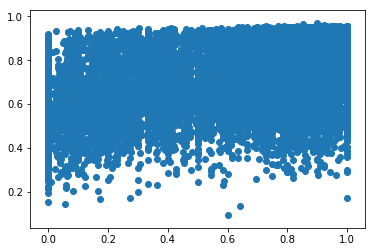

In [140]:
plt.scatter(y_test,preds)

In [141]:
X.head()

,flesch_reading_ease,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,gunning_fog,sentence_count,wps,review_length,pos_no,neg_no,user_deviation,user_delay,stem_sim_length,lem_sim_length,overall
0,-336.56,0.0,166.3,7.69,211.1,26.44,44,14.000000,176.92,1,427.000000,427,2,4,1.399189,10152000.0,15,13,1.0
1,-340.96,0.0,165.9,9.72,210.8,26.37,94,8.666667,175.64,2,423.000000,846,18,8,0.624437,10886400.0,24,23,3.0
2,85.52,7.3,6.2,5.92,7.2,5.87,36,7.666667,13.01,23,19.521739,449,7,6,0.510375,7516800.0,17,16,2.0
3,66.94,10.8,7.1,8.05,6.3,6.99,11,7.200000,14.00,5,12.800000,64,2,0,0.442171,2678400.0,2,2,5.0
4,-43.22,0.0,53.6,8.09,67.2,12.20,15,4.400000,61.55,1,138.000000,138,1,3,1.616074,7603200.0,2,2,1.0


## FEATURE WISE ANALYSIS

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

### With XGB Default Parameters

In [144]:
featurewise_result= pd.DataFrame(columns=['feature', 'mae-XGB','mse-XGB', 'rmse-XGB'])
for col in X.columns:
    tempdict={}
    tempdict['feature']=col
    
    train = X_train[col]
    test  = X_test[col]
    
    train = np.array(train).reshape(-1,1)
    test = np.array(test).reshape(-1,1)
   
    
    #XGB
    regressor = xgb.XGBRegressor()
    regressor.fit(train,y_train)
    preds_2 = regressor.predict(test)


    tempdict['mse-XGB']=mean_squared_error(y_test,preds_2)
    tempdict['rmse-XGB']=math.sqrt(mean_squared_error(y_test,preds_2))
    tempdict['mae-XGB']=mean_absolute_error(y_test,preds_2)
    
    tempSeries=pd.Series(tempdict)
    featurewise_result=featurewise_result.append(tempSeries, ignore_index=True)
    

In [145]:
featurewise_result.to_csv('Feature-wise_XGB_Result.csv',index=False)

In [146]:
featurewise_result

,feature,mae-XGB,mse-XGB,rmse-XGB
0,flesch_reading_ease,0.170034,0.054807,0.234108
1,smog_index,0.170574,0.055085,0.234702
2,flesch_kincaid_grade,0.169690,0.054671,0.233818
3,coleman_liau_index,0.169747,0.054617,0.233702
4,automated_readability_index,0.169729,0.054710,0.233903
5,dale_chall_readability_score,0.169768,0.054587,0.233639
6,difficult_words,0.161996,0.050130,0.223898
7,linsear_write_formula,0.169577,0.054589,0.233643
8,gunning_fog,0.169728,0.054648,0.233768
9,sentence_count,0.171006,0.055324,0.235211


In [169]:
featurewise_result_grid= pd.DataFrame(columns=['feature', 'mae-XGB','mse-XGB', 'rmse-XGB', 'params'])
for col in X.columns:
    tempdict={}
    tempdict['feature']=col
    
    train = X_train[col]
    test  = X_test[col]
    
    train = np.array(train).reshape(-1,1)
    test = np.array(test).reshape(-1,1)
    
    #XGB
    gbm_param_grid = {
    'learning_rate': [0.01,0.09,0.1,0.2,0.5,0.9], 
    'n_estimators': [200,300,400,500], 
    'subsample': [0.3, 0.5, 0.9, 1]}

    gbm = xgb.XGBRegressor()
    regressor = GridSearchCV(estimator=gbm, param_grid=gbm_param_grid, scoring='neg_mean_squared_error', verbose=2)
    regressor.fit(train,y_train)
    preds_2 = regressor.predict(test)


    tempdict['mse-XGB']=mean_squared_error(y_test,preds_2)
    tempdict['rmse-XGB']=math.sqrt(mean_squared_error(y_test,preds_2))
    tempdict['mae-XGB']=mean_absolute_error(y_test,preds_2)
    tempdict['params'] = regressor.best_params_
    
    tempSeries=pd.Series(tempdict)
    featurewise_result_grid=featurewise_result_grid.append(tempSeries, ignore_index=True)
    

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   4.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s


[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   3.7s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   3.7s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   4.1s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   4.1s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   4.1s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=   3.6s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=

[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=   1.1s
[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=   1.2s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   2.4s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   2.4s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   2.4s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=   2.7s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=   2

[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=   2.3s
[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=   2.3s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   1.8s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   1.8s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   1.8s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=   3.3s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=   3.3s
[C

[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=   3.7s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=   3.7s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   3.1s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   3.1s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   3.1s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=   2.4s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=   2.4s
[

[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=   4.2s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=   4.1s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   4.7s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   4.6s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   4.7s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=   3.9s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=   3.9s

[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=   3.0s
[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=   3.0s


[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed: 15.4min finished


Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   1.7s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   1.6s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   1.6s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   1.8s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   1.8s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   1.8s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=   1.5s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=

[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=   1.1s
[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=   1.1s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   2.5s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   2.4s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   2.4s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=   2.7s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=   2

[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=   2.2s
[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=   2.2s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   1.6s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   1.6s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   1.7s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=   3.3s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=   3.3s
[C

[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=   3.6s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=   3.6s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   3.0s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   3.0s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   3.0s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=   2.2s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=   2.2s
[

[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=   4.1s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=   4.2s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   4.6s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   4.6s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   4.6s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=   3.7s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=   3.8s

[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=   2.1s
[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=   2.0s


[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed: 14.1min finished


Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   1.6s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   1.6s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   1.7s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   1.8s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   1.8s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   1.8s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=   1.6s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=

[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=   1.1s
[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=   1.1s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   2.4s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   2.4s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   2.4s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=   2.7s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=   2

[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=   2.2s
[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=   2.2s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   1.7s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   1.7s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   1.7s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=   3.3s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=   3.3s
[C

[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=   3.6s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=   3.6s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   3.0s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   3.0s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   3.0s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=   2.3s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=   2.3s
[

[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=   4.1s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=   4.1s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   4.6s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   4.6s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   4.6s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=   3.8s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=   3.8s

[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=   2.8s
[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=   2.8s


[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed: 14.3min finished


Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   1.6s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   1.6s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   1.6s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   1.8s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   1.8s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   1.8s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=   1.4s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=

[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=   1.1s
[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=   1.1s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   2.4s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   2.4s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   2.4s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=   2.7s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=   2

[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=   2.2s
[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=   2.2s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   1.6s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   1.6s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   1.6s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=   3.2s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=   3.2s
[C

[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=   3.6s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=   3.6s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   2.9s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   2.9s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   2.9s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=   2.2s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=   2.2s
[

[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=   4.1s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=   4.1s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   4.5s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   4.5s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   4.5s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=   3.7s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=   3.7s

[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=   2.9s
[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=   2.8s


[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed: 14.1min finished


Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   1.6s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   1.6s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   1.6s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   1.8s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   1.8s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   1.8s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=   1.5s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=

[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=   1.1s
[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=   1.1s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   2.4s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   2.4s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   2.4s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=   2.7s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=   2

[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=   2.2s
[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=   2.2s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   1.7s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   1.7s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   1.7s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=   3.3s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=   3.3s
[C

[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=   3.6s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=   3.6s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   3.0s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   3.0s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   3.0s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=   2.3s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=   2.3s
[

[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=   4.1s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=   4.1s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   4.6s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   4.6s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   4.6s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=   3.8s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=   3.8s

[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=   2.9s
[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=   2.9s


[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed: 14.3min finished


Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   1.6s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   1.6s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   1.6s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   1.8s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   1.8s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   1.8s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=   1.5s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=

[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=   1.1s
[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=   1.1s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   2.4s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   2.4s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   2.5s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=   2.7s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=   2

[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=   2.2s
[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=   2.2s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   1.7s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   1.7s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   1.7s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=   3.3s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=   3.2s
[C

[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=   3.6s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=   3.7s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   3.0s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   3.0s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   3.0s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=   2.3s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=   2.3s
[

[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=   4.1s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=   4.1s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   4.6s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   4.6s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   4.6s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=   3.8s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=   3.8s

[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=   2.9s
[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=   2.9s


[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed: 14.3min finished


Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   1.6s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   1.6s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   1.6s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   1.8s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   1.8s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   1.8s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=   1.5s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=

[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=   1.1s
[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=   1.1s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   2.6s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   2.5s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   2.5s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=   2.7s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=   2

[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=   2.2s
[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=   2.2s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   1.7s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   1.6s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   1.6s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=   3.3s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=   3.3s
[C

[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=   3.7s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=   3.7s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   3.0s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   3.0s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   3.0s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=   2.2s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=   2.2s
[

[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=   4.1s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=   4.1s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   4.5s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   4.5s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   4.6s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=   3.8s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=   3.7s

[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=   2.1s
[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=   2.0s


[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed: 14.2min finished


Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   1.6s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   1.6s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   1.6s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   1.8s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   1.7s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   1.8s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=   1.4s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=

[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=   1.1s
[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=   1.1s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   2.4s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   2.4s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   2.4s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=   2.7s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=   2

[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=   2.2s
[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=   2.2s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   1.6s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   1.6s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   1.6s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=   3.2s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=   3.2s
[C

[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=   3.6s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=   3.6s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   2.9s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   2.9s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   2.9s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=   2.2s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=   2.2s
[

[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=   4.1s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=   4.1s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   4.6s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   4.5s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   4.5s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=   3.7s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=   4.3s

[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=   2.6s
[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=   2.6s


[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed: 14.1min finished


Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   1.7s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   1.6s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   1.6s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   1.8s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   1.9s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   1.8s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=   1.6s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=

[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=   1.2s
[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=   1.2s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   2.5s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   2.4s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   2.5s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=   2.7s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=   2

[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=   2.3s
[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=   2.3s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   1.8s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   1.9s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   1.8s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=   3.3s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=   3.4s
[C

[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=   3.8s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=   3.7s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   3.1s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   3.1s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   3.1s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=   2.4s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=   2.5s
[

[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=   4.2s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=   4.2s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   4.7s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   4.7s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   4.7s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=   3.9s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=   3.9s

[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=   3.1s
[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=   3.1s


[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed: 14.8min finished


Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   1.6s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   1.7s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   1.6s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   1.8s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   1.8s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   1.8s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=   1.5s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=

[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=   1.1s
[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=   1.1s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   2.5s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   2.5s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   2.5s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=   2.7s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=   2

[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=   2.3s
[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=   2.2s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   1.6s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   1.6s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   1.7s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=   3.3s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=   3.4s
[C

[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=   3.6s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=   3.7s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   3.1s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   3.1s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   3.1s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=   2.2s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=   2.1s
[

[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=   4.2s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=   4.2s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   4.6s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   4.6s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   4.6s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=   3.9s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=   3.9s

[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=   1.8s
[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=   1.8s


[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed: 14.2min finished


Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   1.7s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   1.7s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   1.7s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   1.9s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   1.9s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   1.9s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=   1.6s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=

[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=   1.2s
[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=   1.2s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   2.5s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   2.5s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   2.4s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=   2.7s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=   2

[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=   2.3s
[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=   2.3s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   1.8s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   1.8s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   1.8s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=   3.3s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=   3.3s
[C

[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=   3.7s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=   3.7s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   3.1s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   3.1s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   3.1s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=   2.4s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=   2.4s
[

[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=   4.2s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=   4.2s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   4.7s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   4.6s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   4.7s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=   3.9s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=   3.9s

[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=   6.6s
[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=   6.6s


[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed: 16.7min finished


Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   3.6s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s


[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   3.6s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   3.6s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   4.0s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   4.0s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   4.1s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=   3.4s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=

[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=   2.4s
[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=   2.4s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   5.3s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   5.3s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   5.3s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=   6.0s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=   5

[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=   4.8s
[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=   4.9s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   3.6s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   3.6s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   3.6s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=   7.0s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=   7.0s
[C

[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=   7.9s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=   7.9s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   6.5s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   6.5s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   6.4s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=   4.9s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=   4.9s
[

[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=   8.8s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=   8.8s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   9.8s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   9.9s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   9.9s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=   8.1s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=   8.1s

[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=   8.2s
[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=   7.9s


[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed: 141.8min finished


Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   3.8s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   4.1s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   4.0s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   4.4s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   4.4s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   4.3s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=   3.4s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=

[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=   3.1s
[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=   2.5s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   6.1s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   5.6s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   5.8s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=   6.1s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=   6

[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=   5.4s
[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=   5.6s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   4.7s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   4.7s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   4.0s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=   7.7s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=   7.6s
[C

[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=   8.2s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=   8.1s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   7.0s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   6.9s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   6.9s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=   4.9s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=   4.9s
[

[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=   9.4s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=   9.3s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=  10.5s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=  10.1s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=  10.1s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=   8.7s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=   8.4s

[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=   4.1s
[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=   4.1s


[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed: 32.1min finished


Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   3.6s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   3.7s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   3.9s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   4.1s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   3.9s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   4.1s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=   3.5s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=

[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=   2.6s
[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=   2.8s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   5.8s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   5.7s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   6.0s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=   6.4s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=   6

[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=   5.2s
[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=   5.1s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   3.8s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   3.8s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   3.5s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=   7.4s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=   7.6s
[C

[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=   9.6s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=   9.3s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   7.7s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   7.9s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   8.0s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=   5.6s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=   4.8s
[

[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=  11.4s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=  10.8s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=  12.1s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=  10.6s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=  11.6s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=   9.1s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=   9.1s

[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=   3.8s
[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=   3.7s


[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed: 33.0min finished


Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   3.8s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s


[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   3.8s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   3.8s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   4.3s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   4.3s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   4.3s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=   3.8s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=

[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=   3.1s
[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=   3.5s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   7.5s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   5.6s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   6.7s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=   6.5s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=   6

[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=   5.8s
[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=   5.9s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   4.8s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   5.0s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   4.5s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=   7.9s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=   8.2s
[C

[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=   9.0s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=   9.1s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   9.2s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   9.0s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   8.4s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=   6.7s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=   7.0s
[

[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=   9.8s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=   9.9s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=  11.3s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   9.6s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=  12.8s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=  10.4s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=  10.5s

[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=   8.2s
[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=   8.3s


[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed: 36.5min finished


Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   3.9s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s


[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   3.9s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   3.9s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   4.4s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   4.3s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   4.4s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=   3.6s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=

[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=   2.7s
[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=   2.7s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   5.7s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   5.6s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   5.5s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=   6.3s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=   6

[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=   6.1s
[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=   6.1s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   5.0s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   5.0s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   5.0s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=   8.9s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=   8.5s
[C

[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=   9.4s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=   9.5s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   7.7s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   8.0s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   8.0s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=   7.2s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=   6.4s
[

[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=   4.2s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=   4.2s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   4.7s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   4.7s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   4.7s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=   3.9s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=   3.9s

[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=   3.4s
[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=   3.3s


[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed: 29.9min finished


Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   1.8s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   1.9s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   1.8s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   1.9s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   1.9s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   1.9s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=   1.7s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=

[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=   1.1s
[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=   1.1s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   2.6s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   2.6s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   2.6s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=   2.9s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=   2

[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=   2.5s
[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=   2.4s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   1.7s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   1.7s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   1.7s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=   3.5s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=   3.5s
[C

[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=   3.9s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=   4.0s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   3.3s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   3.3s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   3.3s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=   2.2s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=   2.1s
[

[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=   4.5s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=   4.4s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   4.9s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   4.9s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   5.0s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=   4.1s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=   4.3s

[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=   1.8s
[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=   1.7s


[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed: 15.1min finished


Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   1.6s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   1.6s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   1.6s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   1.8s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   1.8s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   1.8s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=   1.5s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=

[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=   1.1s
[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=   1.1s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   2.5s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   2.5s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   2.7s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=   3.1s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=   3

[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=   2.3s
[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=   2.3s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   1.6s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   1.6s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   1.6s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=   3.3s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=   3.4s
[C

[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=   3.8s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=   3.7s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   3.1s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   3.1s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   3.1s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=   1.9s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=   1.9s
[

[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=   4.4s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=   4.4s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   4.9s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   4.9s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   4.9s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=   4.1s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=   4.1s

[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=   1.9s
[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=   1.9s


[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed: 14.8min finished


Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   1.6s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   1.7s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   1.7s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   1.8s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   1.8s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   2.1s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=   1.6s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=

[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=   0.9s
[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=   0.9s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   2.5s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   2.5s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   2.5s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=   2.7s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=   2

[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=   2.3s
[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=   2.4s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   1.2s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   1.2s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   1.2s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=   3.4s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=   3.5s
[C

[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=   3.8s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=   3.7s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   3.3s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   3.2s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   3.3s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=   1.5s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=   1.5s
[

[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=   4.3s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=   4.4s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   5.1s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   4.8s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   4.8s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=   4.2s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=   4.1s

[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=   1.8s
[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=   1.7s


[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed: 13.8min finished


In [166]:
regressor.best_params

AttributeError: 'GridSearchCV' object has no attribute 'best_params'

In [ ]:
featurewise_result_grid.to_csv('Feature-wise_XGB_GRID_Result.csv',index=False)

In [170]:
featurewise_result_grid

,feature,mae-XGB,mse-XGB,rmse-XGB,params
0,flesch_reading_ease,0.170913,0.054861,0.234225,"{'learning_rate': 0.01, 'n_estimators': 500, '..."
1,smog_index,0.170490,0.055044,0.234615,"{'learning_rate': 0.09, 'n_estimators': 200, '..."
2,flesch_kincaid_grade,0.169514,0.054573,0.233608,"{'learning_rate': 0.09, 'n_estimators': 200, '..."
3,coleman_liau_index,0.170503,0.054596,0.233658,"{'learning_rate': 0.01, 'n_estimators': 500, '..."
4,automated_readability_index,0.170460,0.054676,0.233830,"{'learning_rate': 0.01, 'n_estimators': 500, '..."
5,dale_chall_readability_score,0.170609,0.054592,0.233649,"{'learning_rate': 0.01, 'n_estimators': 500, '..."
6,difficult_words,0.162666,0.050118,0.223871,"{'learning_rate': 0.01, 'n_estimators': 500, '..."
7,linsear_write_formula,0.168794,0.054151,0.232704,"{'learning_rate': 0.1, 'n_estimators': 500, 's..."
8,gunning_fog,0.170629,0.054671,0.233818,"{'learning_rate': 0.01, 'n_estimators': 500, '..."
9,sentence_count,0.171821,0.055321,0.235204,"{'learning_rate': 0.01, 'n_estimators': 500, '..."


## CATEGORY WISE ANALYSIS

#### XGB DEFAULTS

In [ ]:
categorywise_result= pd.DataFrame(columns=['category','mae-XGB','mse-XGB','rmse-XGB'])

In [ ]:
#USER FEATURES vs. HELPFULNESS
tempdict={}
tempdict['category']='User Features'

cols = ['user_deviation', 'user_delay']
train = X_train[cols]
test  = X_test[cols]

#XGB
regressor = xgb.XGBRegressor()
regressor.fit(train,y_train)
preds_2 = regressor.predict(test)


tempdict['mse-XGB']=mean_squared_error(y_test,preds_2)
tempdict['rmse-XGB']=math.sqrt(mean_squared_error(y_test,preds_2))
tempdict['mae-XGB']=mean_absolute_error(y_test,preds_2)

tempSeries=pd.Series(tempdict)
categorywise_result=categorywise_result.append(tempSeries, ignore_index=True)

In [ ]:
#REVIEW TEXT FEATURES vs. HELPFULNESS
tempdict={}
tempdict['category']='Review Text Features'

cols = ['flesch_reading_ease', 'smog_index', 'flesch_kincaid_grade',
       'coleman_liau_index', 'automated_readability_index',
       'dale_chall_readability_score', 'difficult_words',
       'linsear_write_formula', 'gunning_fog', 'sentence_count', 'wps',
       'review_length', 'pos_no', 'neg_no',]
train = X_train[cols]
test  = X_test[cols]

#XGB
regressor = xgb.XGBRegressor()
regressor.fit(train,y_train)
preds_2 = regressor.predict(test)

tempdict['mse-XGB']=mean_squared_error(y_test,preds_2)
tempdict['rmse-XGB']=math.sqrt(mean_squared_error(y_test,preds_2))
tempdict['mae-XGB']=mean_absolute_error(y_test,preds_2)

tempSeries=pd.Series(tempdict)
categorywise_result=categorywise_result.append(tempSeries, ignore_index=True)

In [ ]:
#METADATA FEATURES vs. HELPFULNESS
tempdict={}
tempdict['category']='Meta Data Features'

cols = ['stem_sim_length', 'lem_sim_length', 'overall']
train = X_train[cols]
test  = X_test[cols]

#XGB
regressor = xgb.XGBRegressor()
regressor.fit(train,y_train)
preds_2 = regressor.predict(test)

tempdict['mse-XGB']=mean_squared_error(y_test,preds_2)
tempdict['rmse-XGB']=math.sqrt(mean_squared_error(y_test,preds_2))
tempdict['mae-XGB']=mean_absolute_error(y_test,preds_2)

tempSeries=pd.Series(tempdict)
categorywise_result=categorywise_result.append(tempSeries, ignore_index=True)

In [ ]:
categorywise_result

In [ ]:
categorywise_result.to_csv('Categorywise_XGB_Result.csv', index=False)

#### XGB WITH GRID SEARCH

In [171]:
categorywise_result_grid= pd.DataFrame(columns=['category','mae-XGB','mse-XGB','rmse-XGB','params'])

In [172]:
#USER FEATURES vs. HELPFULNESS
tempdict={}
tempdict['category']='User Features'

cols = ['user_deviation', 'user_delay']
train = X_train[cols]
test  = X_test[cols]


#XGB
gbm_param_grid = {
'learning_rate': [0.01,0.09,0.1,0.2,0.5,0.9], 
'n_estimators': [200,300,400,500], 
'subsample': [0.3, 0.5, 0.9, 1]}

gbm = xgb.XGBRegressor()
regressor = GridSearchCV(estimator=gbm, param_grid=gbm_param_grid, scoring='neg_mean_squared_error', verbose=2)
regressor.fit(train,y_train)
preds_2 = regressor.predict(test)



tempdict['mse-XGB']=mean_squared_error(y_test,preds_2)
tempdict['rmse-XGB']=math.sqrt(mean_squared_error(y_test,preds_2))
tempdict['mae-XGB']=mean_absolute_error(y_test,preds_2)
tempdict['params'] = regressor.best_params_

tempSeries=pd.Series(tempdict)
categorywise_result_grid=categorywise_result_grid.append(tempSeries, ignore_index=True)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   2.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   2.1s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   2.1s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   2.5s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   2.5s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   2.5s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=   2.6s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=

[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=   3.9s
[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=   3.8s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   6.8s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   6.8s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   6.7s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=   7.8s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=   7

[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=   6.9s
[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=   6.8s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   5.8s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   5.7s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   5.8s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=   9.0s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=   9.0s
[C

[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=  10.4s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=  10.4s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   9.1s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   9.1s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   9.1s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=   7.7s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=   7.6s
[

[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=  11.5s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=  11.5s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=  13.2s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=  13.2s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=  13.3s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=  11.7s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=  11.6s

[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=   9.8s
[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=   9.8s


[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed: 40.6min finished


In [173]:
#REVIEW TEXT FEATURES vs. HELPFULNESS
tempdict={}
tempdict['category']='Review Text Features'

cols = ['flesch_reading_ease', 'smog_index', 'flesch_kincaid_grade',
       'coleman_liau_index', 'automated_readability_index',
       'dale_chall_readability_score', 'difficult_words',
       'linsear_write_formula', 'gunning_fog', 'sentence_count', 'wps',
       'review_length', 'pos_no', 'neg_no',]
train = X_train[cols]
test  = X_test[cols]

#XGB
gbm_param_grid = {
'learning_rate': [0.01,0.09,0.1,0.2,0.5,0.9], 
'n_estimators': [200,300,400,500], 
'subsample': [0.3, 0.5, 0.9, 1]}

gbm = xgb.XGBRegressor()
regressor = GridSearchCV(estimator=gbm, param_grid=gbm_param_grid, scoring='neg_mean_squared_error', verbose=2)
regressor.fit(train,y_train)
preds_2 = regressor.predict(test)

tempdict['mse-XGB']=mean_squared_error(y_test,preds_2)
tempdict['rmse-XGB']=math.sqrt(mean_squared_error(y_test,preds_2))
tempdict['mae-XGB']=mean_absolute_error(y_test,preds_2)
tempdict['params'] = regressor.best_params_

tempSeries=pd.Series(tempdict)
categorywise_result_grid=categorywise_result_grid.append(tempSeries, ignore_index=True)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=  11.8s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.2s remaining:    0.0s


[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=  11.7s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=  11.6s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=  13.6s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=  13.6s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=  13.6s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=  12.4s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=

[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=  11.2s
[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=  11.3s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=  17.0s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=  17.1s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=  17.1s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=338.3min
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=  1

[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=  19.7s
[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=  20.2s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=  17.5s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=  17.7s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=  18.8s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=  22.7s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=  24.3s
[C

[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=  28.5s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=  28.7s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=  25.1s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=  28.1s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=  26.6s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=  22.8s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=  22.7s
[

[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=  32.9s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=  33.8s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=  35.4s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=  35.8s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=  34.4s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=  31.6s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=  31.9s

[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=  16.9s
[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=  16.9s


[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed: 438.9min finished


In [174]:
#METADATA FEATURES vs. HELPFULNESS
tempdict={}
tempdict['category']='Meta Data Features'

cols = ['stem_sim_length', 'lem_sim_length', 'overall']
train = X_train[cols]
test  = X_test[cols]

#XGB
gbm_param_grid = {
'learning_rate': [0.01,0.09,0.1,0.2,0.5,0.9], 
'n_estimators': [200,300,400,500], 
'subsample': [0.3, 0.5, 0.9, 1]}

gbm = xgb.XGBRegressor()
regressor = GridSearchCV(estimator=gbm, param_grid=gbm_param_grid, scoring='neg_mean_squared_error', verbose=2)
regressor.fit(train,y_train)
preds_2 = regressor.predict(test)


tempdict['mse-XGB']=mean_squared_error(y_test,preds_2)
tempdict['rmse-XGB']=math.sqrt(mean_squared_error(y_test,preds_2))
tempdict['mae-XGB']=mean_absolute_error(y_test,preds_2)
tempdict['params'] = regressor.best_params_

tempSeries=pd.Series(tempdict)
categorywise_result_grid=categorywise_result_grid.append(tempSeries, ignore_index=True)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   3.3s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   3.0s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.3 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.3, total=   3.0s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   3.4s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   3.4s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.5 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.5, total=   3.3s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=   2.8s
[CV] learning_rate=0.01, n_estimators=200, subsample=0.9 .............
[CV]  learning_rate=0.01, n_estimators=200, subsample=0.9, total=

[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=   2.3s
[CV] learning_rate=0.09, n_estimators=200, subsample=1 ...............
[CV]  learning_rate=0.09, n_estimators=200, subsample=1, total=   2.2s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   4.7s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   4.5s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.3 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.3, total=   4.4s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=   4.9s
[CV] learning_rate=0.09, n_estimators=300, subsample=0.5 .............
[CV]  learning_rate=0.09, n_estimators=300, subsample=0.5, total=   4

[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=   4.1s
[CV] learning_rate=0.1, n_estimators=300, subsample=0.9 ..............
[CV]  learning_rate=0.1, n_estimators=300, subsample=0.9, total=   4.2s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   3.2s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   3.2s
[CV] learning_rate=0.1, n_estimators=300, subsample=1 ................
[CV] . learning_rate=0.1, n_estimators=300, subsample=1, total=   3.2s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=   6.1s
[CV] learning_rate=0.1, n_estimators=400, subsample=0.3 ..............
[CV]  learning_rate=0.1, n_estimators=400, subsample=0.3, total=   6.5s
[C

[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=   6.5s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.5 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.5, total=   6.5s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   5.9s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   5.5s
[CV] learning_rate=0.2, n_estimators=400, subsample=0.9 ..............
[CV]  learning_rate=0.2, n_estimators=400, subsample=0.9, total=   5.7s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=   4.2s
[CV] learning_rate=0.2, n_estimators=400, subsample=1 ................
[CV] . learning_rate=0.2, n_estimators=400, subsample=1, total=   4.2s
[

[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=   7.3s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.3 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.3, total=   7.3s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   8.3s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   8.6s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.5 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.5, total=   8.2s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=   6.8s
[CV] learning_rate=0.5, n_estimators=500, subsample=0.9 ..............
[CV]  learning_rate=0.5, n_estimators=500, subsample=0.9, total=   6.8s

[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=   5.5s
[CV] learning_rate=0.9, n_estimators=500, subsample=1 ................
[CV] . learning_rate=0.9, n_estimators=500, subsample=1, total=   5.4s


[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed: 26.0min finished


In [175]:
categorywise_result_grid

,category,mae-XGB,mse-XGB,rmse-XGB,params
0,User Features,0.159716,0.049993,0.223591,"{'learning_rate': 0.01, 'n_estimators': 500, '..."
1,Review Text Features,0.155950,0.047419,0.217758,"{'learning_rate': 0.09, 'n_estimators': 200, '..."
2,Meta Data Features,0.142355,0.041994,0.204923,"{'learning_rate': 0.01, 'n_estimators': 500, '..."


In [176]:
categorywise_result_grid.to_csv('Categorywise_XGB_GRID_Result.csv', index=False)